<a href="https://colab.research.google.com/github/keripikkaneboo/Machine-Learning/blob/main/04.%20Week%204/TugasWeek4_Flu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [15]:
df = pd.read_csv("https://raw.githubusercontent.com/keripikkaneboo/Machine-Learning/refs/heads/main/04.%20Week%204/Datasets/flu.csv")
df.head()

,Diagnosis,InitialPCRDiagnosis,Age,Sex,neutrophil,serumLevelsOfWhiteBloodCell,lymphocytes,CReactiveProteinLevels,DurationOfIllness,CTscanResults,RiskFactors,GroundGlassOpacity,Diarrhea,Fever,Coughing,ShortnessOfBreath,SoreThroat,NauseaVomitting,Temperature,Fatigue
0,H1N1,NaN,67.0,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,NaN,No,NaN,38.111111,No
1,H1N1,NaN,29.0,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,H1N1,NaN,22.0,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,H1N1,NaN,20.0,F,NaN,NaN,NaN,NaN,NaN,NaN,immuno,NaN,NaN,Yes,Yes,NaN,No,NaN,36.555556,Yes
4,H1N1,NaN,21.0,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# Drop kolom dengan missing value terlalu banyak (>80%)
missing_thresh = 0.8
data = df.loc[:, df.isnull().mean() < missing_thresh]

# Isi missing value
for col in data.columns:
    if data[col].dtype == "float64":
        data[col] = data[col].fillna(data[col].median())
    elif data[col].dtype == "object":
        data[col] = data[col].fillna(data[col].mode()[0])

# Label Encoding untuk kolom kategorik
le = LabelEncoder()
for col in data.columns:
    if data[col].dtype == "object":
        data[col] = le.fit_transform(data[col])

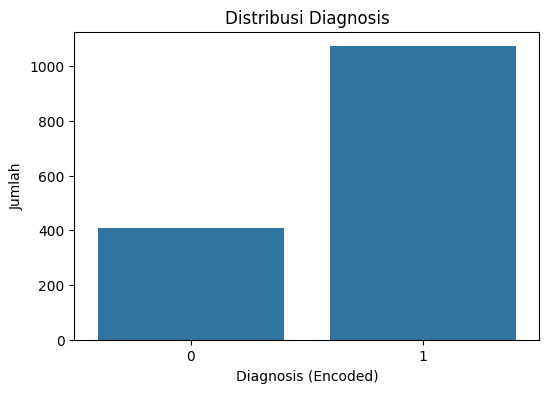

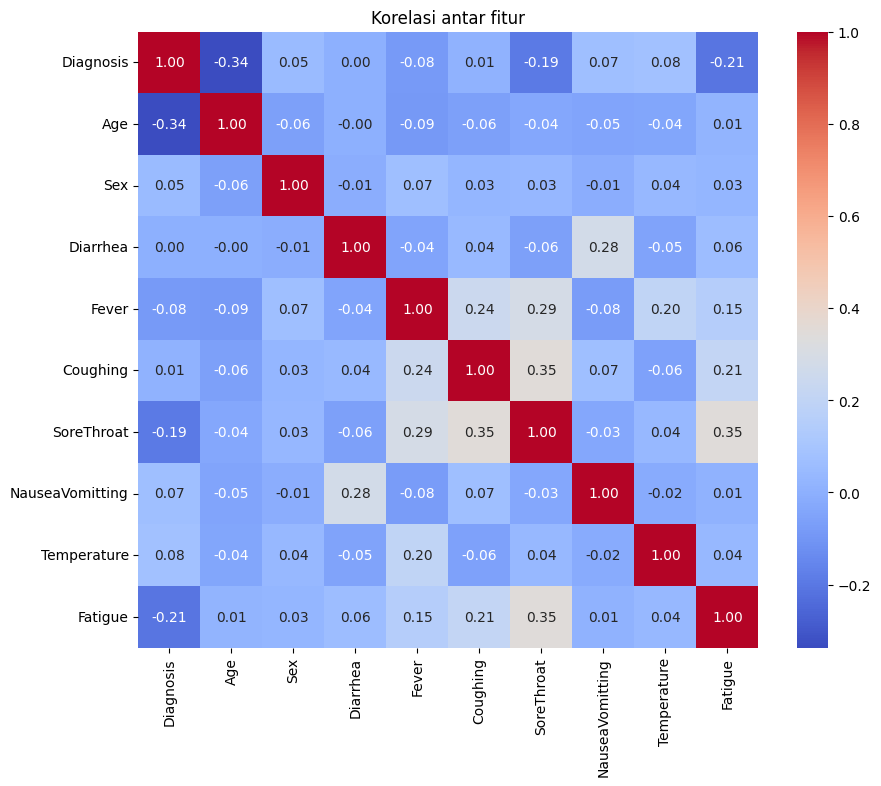

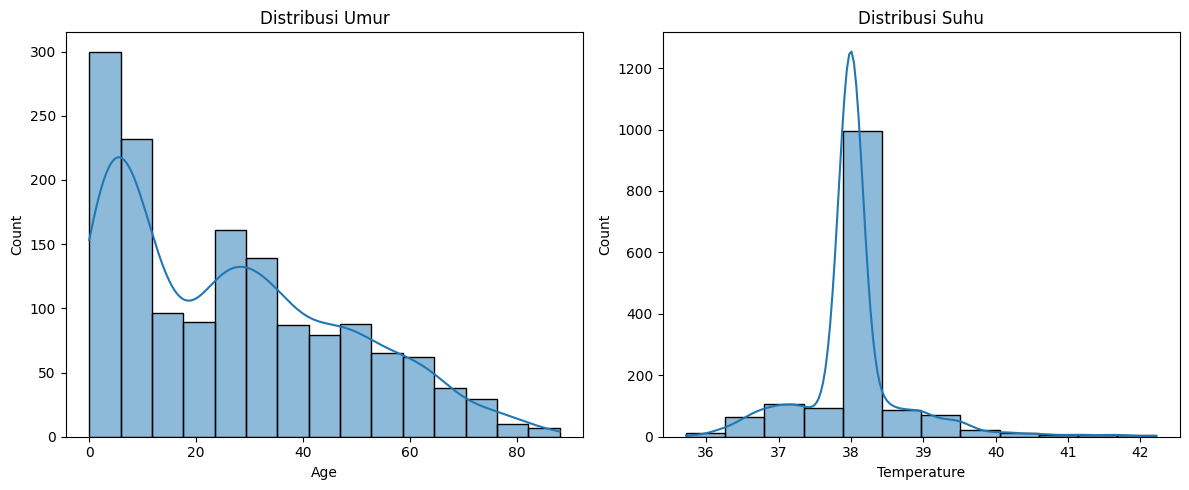

In [21]:
# Countplot Diagnosis
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Diagnosis')
plt.title("Distribusi Diagnosis")
plt.xlabel("Diagnosis (Encoded)")
plt.ylabel("Jumlah")
plt.show()

# Heatmap korelasi
plt.figure(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasi antar fitur")
plt.show()

# Histogram fitur numerik
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(data=data, x='Age', kde=True, ax=axes[0])
axes[0].set_title("Distribusi Umur")

sns.histplot(data=data, x='Temperature', kde=True, ax=axes[1])
axes[1].set_title("Distribusi Suhu")
plt.tight_layout()
plt.show()

In [22]:
# Pisahkan fitur dan target
X = data.drop("Diagnosis", axis=1)
y = data["Diagnosis"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi dan fit model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.64      0.62      0.63        90
           1       0.84      0.85      0.84       207

    accuracy                           0.78       297
   macro avg       0.74      0.73      0.74       297
weighted avg       0.78      0.78      0.78       297

=== Confusion Matrix ===
[[ 56  34]
 [ 32 175]]
ROC AUC Score: 0.7989533011272142


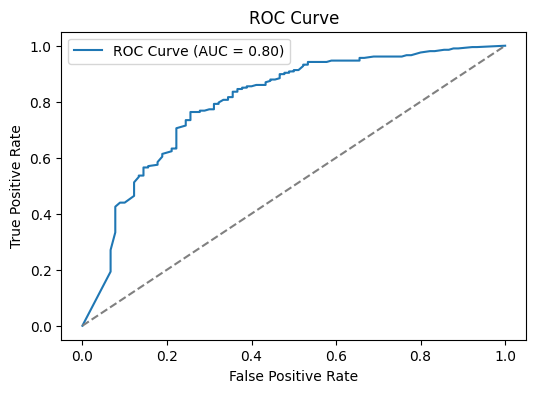

In [23]:
# Prediksi dan probabilitas
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Laporan klasifikasi
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))

# ROC AUC
roc_auc = roc_auc_score(y_test, y_proba)
print("ROC AUC Score:", roc_auc)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()





### 1. **Confusion Matrix**
Pertama-tama, semua metrik didasarkan pada **Confusion Matrix** (Matriks Kebingungan), yang bentuknya seperti ini:

|                        | Prediksi Positif | Prediksi Negatif |
|------------------------|------------------|------------------|
| **Kelas Positif (1)**  | TP (True Positive) | FN (False Negative) |
| **Kelas Negatif (0)**  | FP (False Positive) | TN (True Negative) |

---

### 2. **Akurasi (Accuracy)**  
Mengukur berapa banyak prediksi yang benar dibandingkan total data.

$$
\text{Akurasi} = \frac{TP + TN}{TP + TN + FP + FN}
$$

✅ *Semua prediksi yang benar, dibagi total keseluruhan data.*

---

### 3. **Presisi (Precision)**  
Mengukur seberapa banyak dari semua prediksi positif yang benar-benar positif.

$$
\text{Presisi} = \frac{TP}{TP + FP}
$$

✅ *Dari semua yang model bilang "positif", berapa yang benar-benar positif?*

---

### 5. **F1-Score**  
Merupakan rata-rata harmonik dari **Presisi** dan **Recall**. Berguna saat kamu ingin keseimbangan antara keduanya.

$$
\text{F1 Score} = 2 \cdot \frac{\text{Presisi} \cdot \text{Recall}}{\text{Presisi} + \text{Recall}}
$$

 *Jika salah satu dari Precision atau Recall rendah, F1 Score juga akan rendah.*

---

### 6. **ROC Curve (Receiver Operating Characteristic)**  
ROC adalah grafik yang membandingkan:

- **True Positive Rate (TPR) = Recall**  
$$
TPR = \frac{TP}{TP + FN}
$$

- **False Positive Rate (FPR)**  
$$
FPR = \frac{FP}{FP + TN}
$$

ROC menunjukkan performa model di berbagai threshold probabilitas.

---

### 7. **AUC (Area Under the Curve)**  
Mengukur luas di bawah kurva ROC.

$$
0 \leq \text{AUC} \leq 1
$$

- AUC = 1 → sempurna  
- AUC = 0.5 → tebak-tebakan  
- AUC > 0.7 → cukup bagus  
- AUC > 0.8 → sangat bagus

*AUC mengukur kemampuan model membedakan antara kelas 1 dan 0.*

---
